Loading the data and Familiarizing the data

In [94]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import warnings
from scipy import stats

In [95]:
#Loading data into dataframe

data = pd.read_csv("/content/suicide_data.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [96]:
#Shape of dataframe

data.shape

(27820, 12)

In [97]:
#Listing the features of the dataset

data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [98]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [100]:
data.age.value_counts()

,count
age,
15-24 years,4642
35-54 years,4642
75+ years,4642
25-34 years,4642
55-74 years,4642
5-14 years,4610


In [101]:
data.generation.value_counts()

,count
generation,
Generation X,6408
Silent,6364
Millenials,5844
Boomers,4990
G.I. Generation,2744
Generation Z,1470


In [102]:
#Listing countries

country = data.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

Visualization and EDA

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicides_no'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'suicides/100k pop'}>],
       [<Axes: title={'center': 'HDI for year'}>,
        <Axes: title={'center': 'gdp_per_capita'}>]], dtype=object)

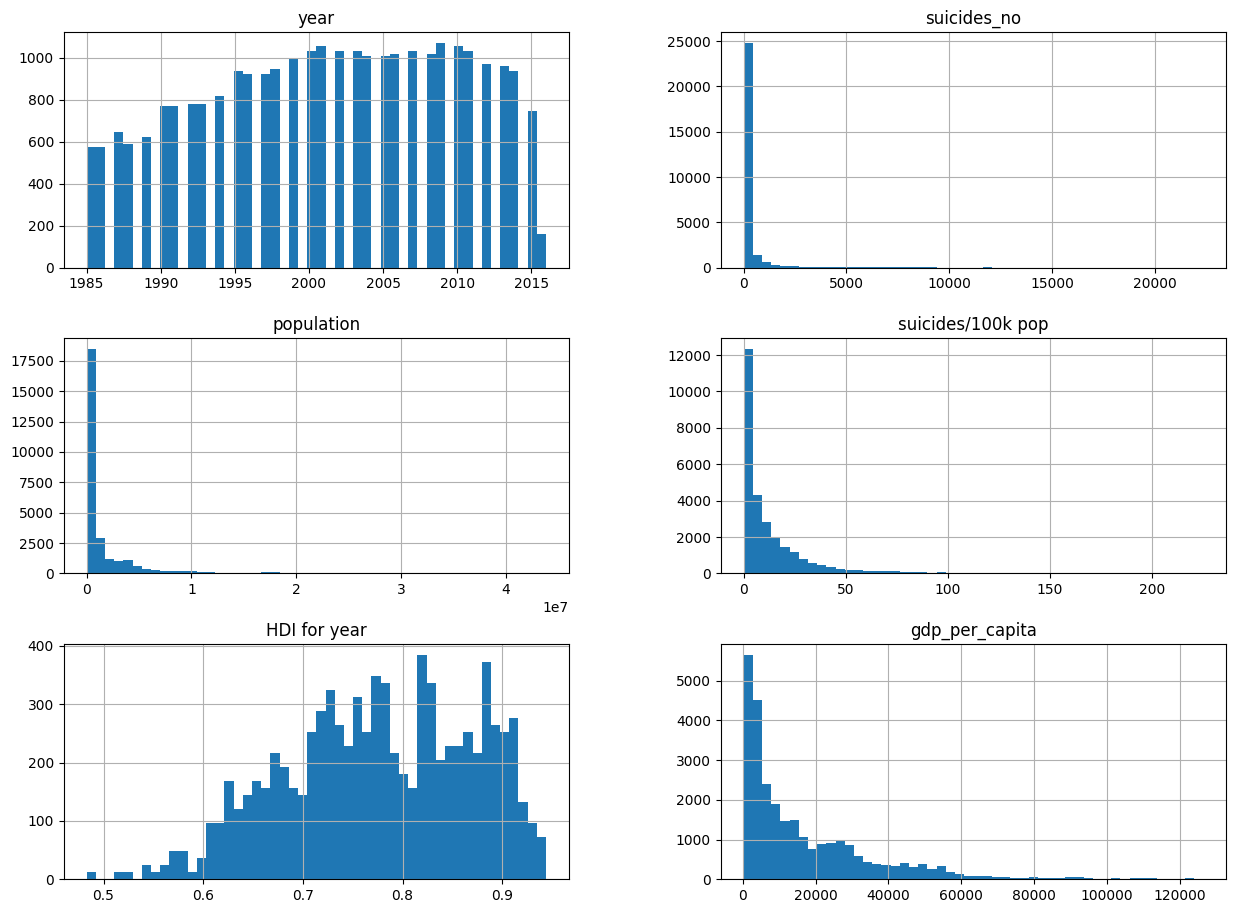

In [103]:
data.hist(bins = 50,figsize = (15,11))

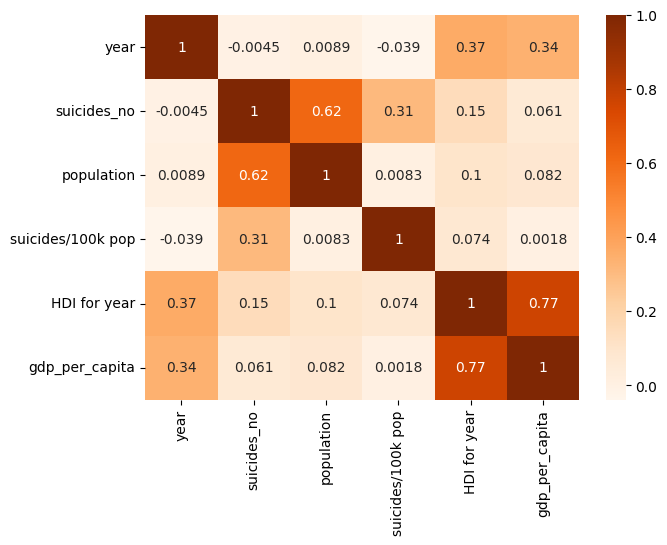

In [104]:
#Correlation heatmap
numerical_data = data.select_dtypes(include=np.number)
plt.figure(figsize=(7,5))
sns.heatmap(numerical_data.corr(), annot=True, cmap='Oranges')
plt.show()

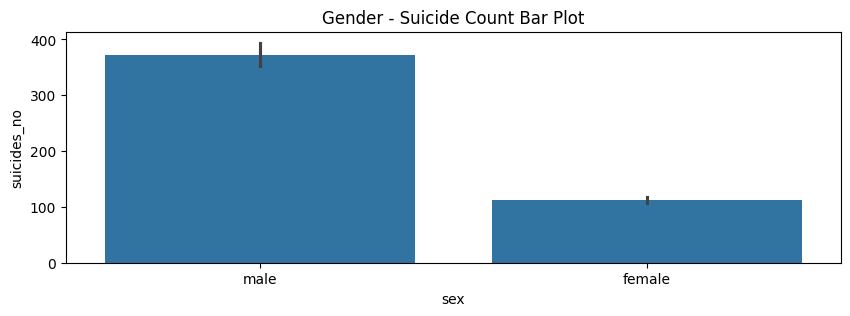

In [108]:
#Gender and suicide count bar plot

plt.figure(figsize=(10,3))
sns.barplot(x='sex', y='suicides_no', data=data)
plt.title('Gender - Suicide Count Bar Plot')
plt.show()

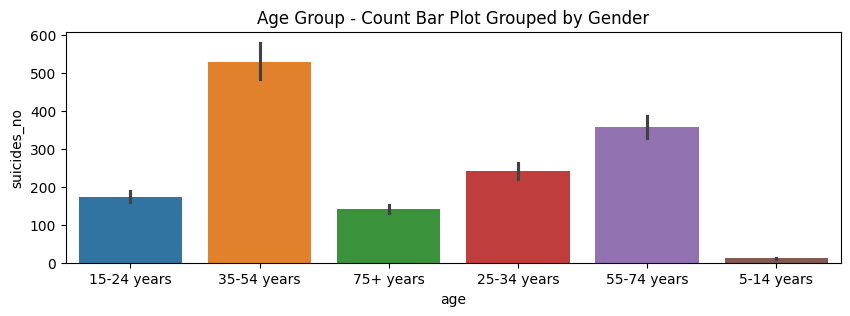

In [110]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,3))
sns.barplot(x = "age", y = "suicides_no", hue = "age", data = data)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

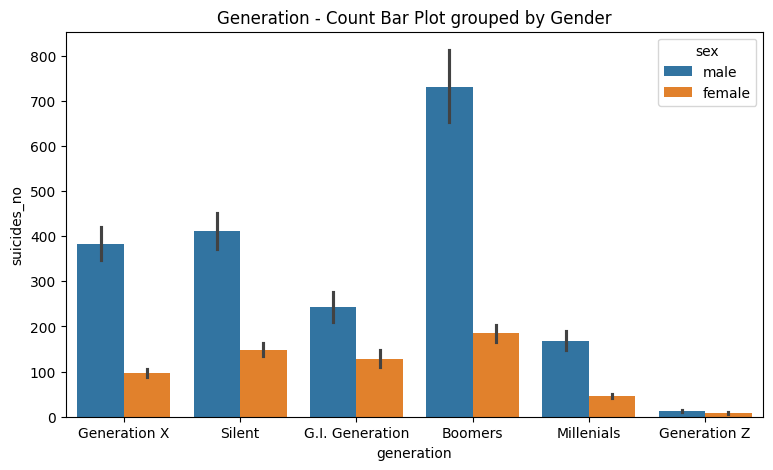

In [112]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicides_no", hue = "sex", data = data)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

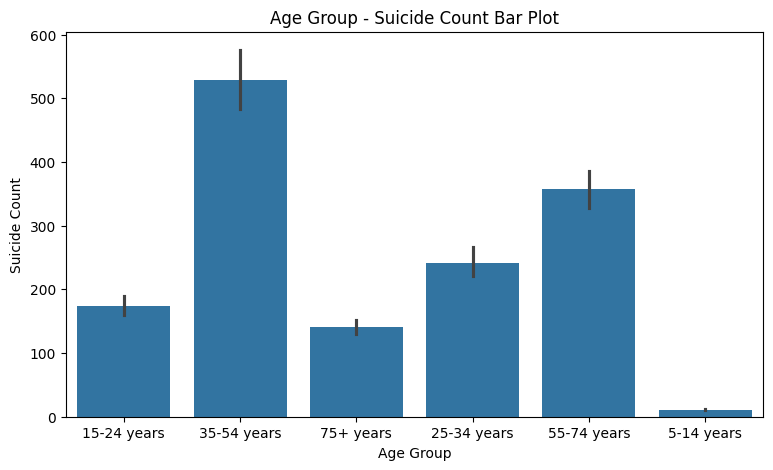

In [114]:
# Age Group and Suicide count bar plot

plt.figure(figsize=(9,5))
sns.barplot(x=data['age'], y=data['suicides_no'])
plt.xlabel('Age Group')
plt.ylabel('Suicide Count')
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

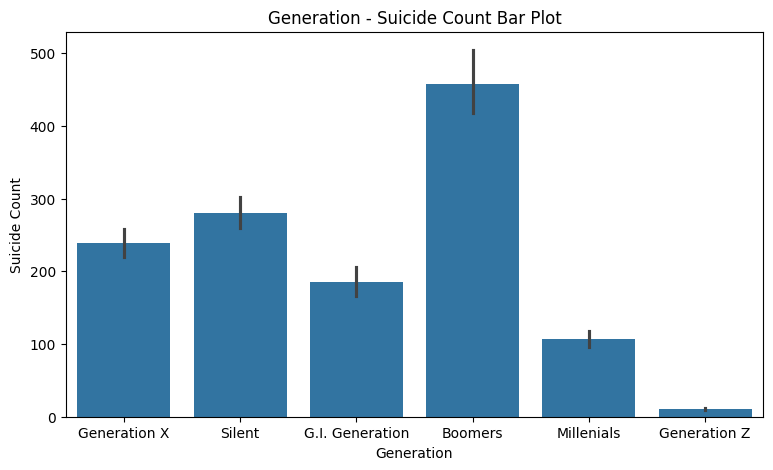

In [115]:
#Generation & Suicide Count Bar Plot

plt.figure(figsize=(9,5))
sns.barplot(x=data['generation'], y=data['suicides_no'])
plt.xlabel('Generation')
plt.ylabel('Suicide Count')
plt.title('Generation - Suicide Count Bar Plot')
plt.show()

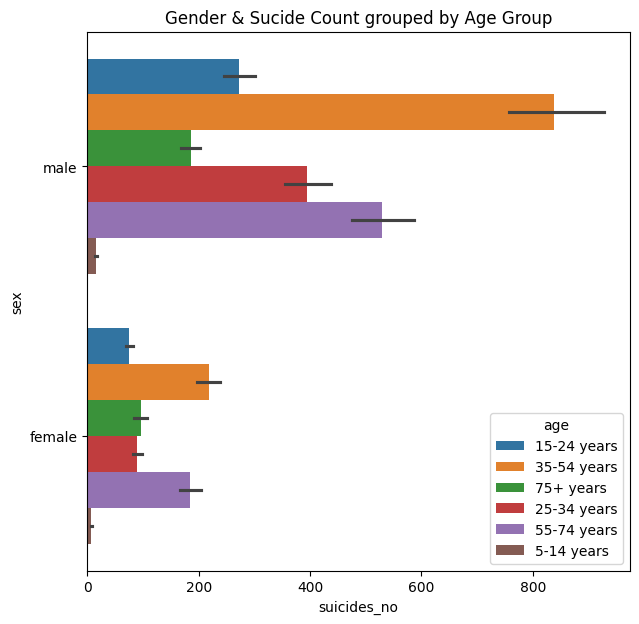

In [117]:
#Gender & Sucide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(y="sex", x="suicides_no", hue="age", data=data)
plt.title('Gender & Sucide Count grouped by Age Group')
plt.show()

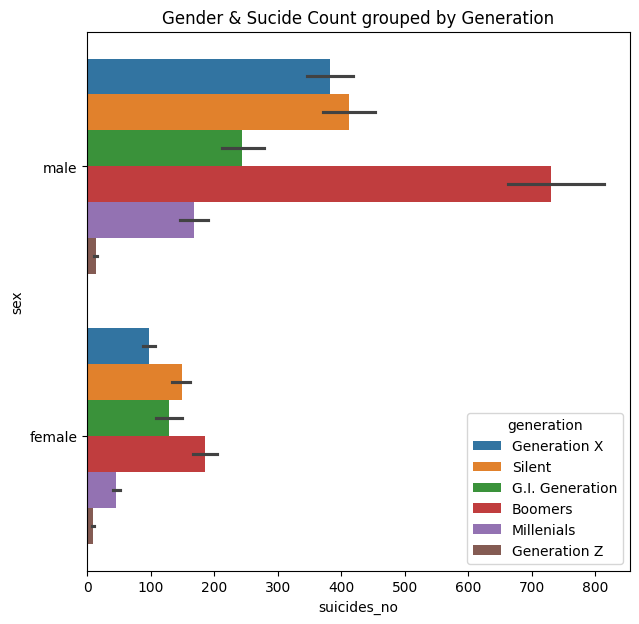

In [119]:
#Gender & Sucide Count grouped by Generation bar plot

plt.figure(figsize=(7,7))
sns.barplot(y="sex", x="suicides_no", hue="generation", data=data)
plt.title('Gender & Sucide Count grouped by Generation')
plt.show()

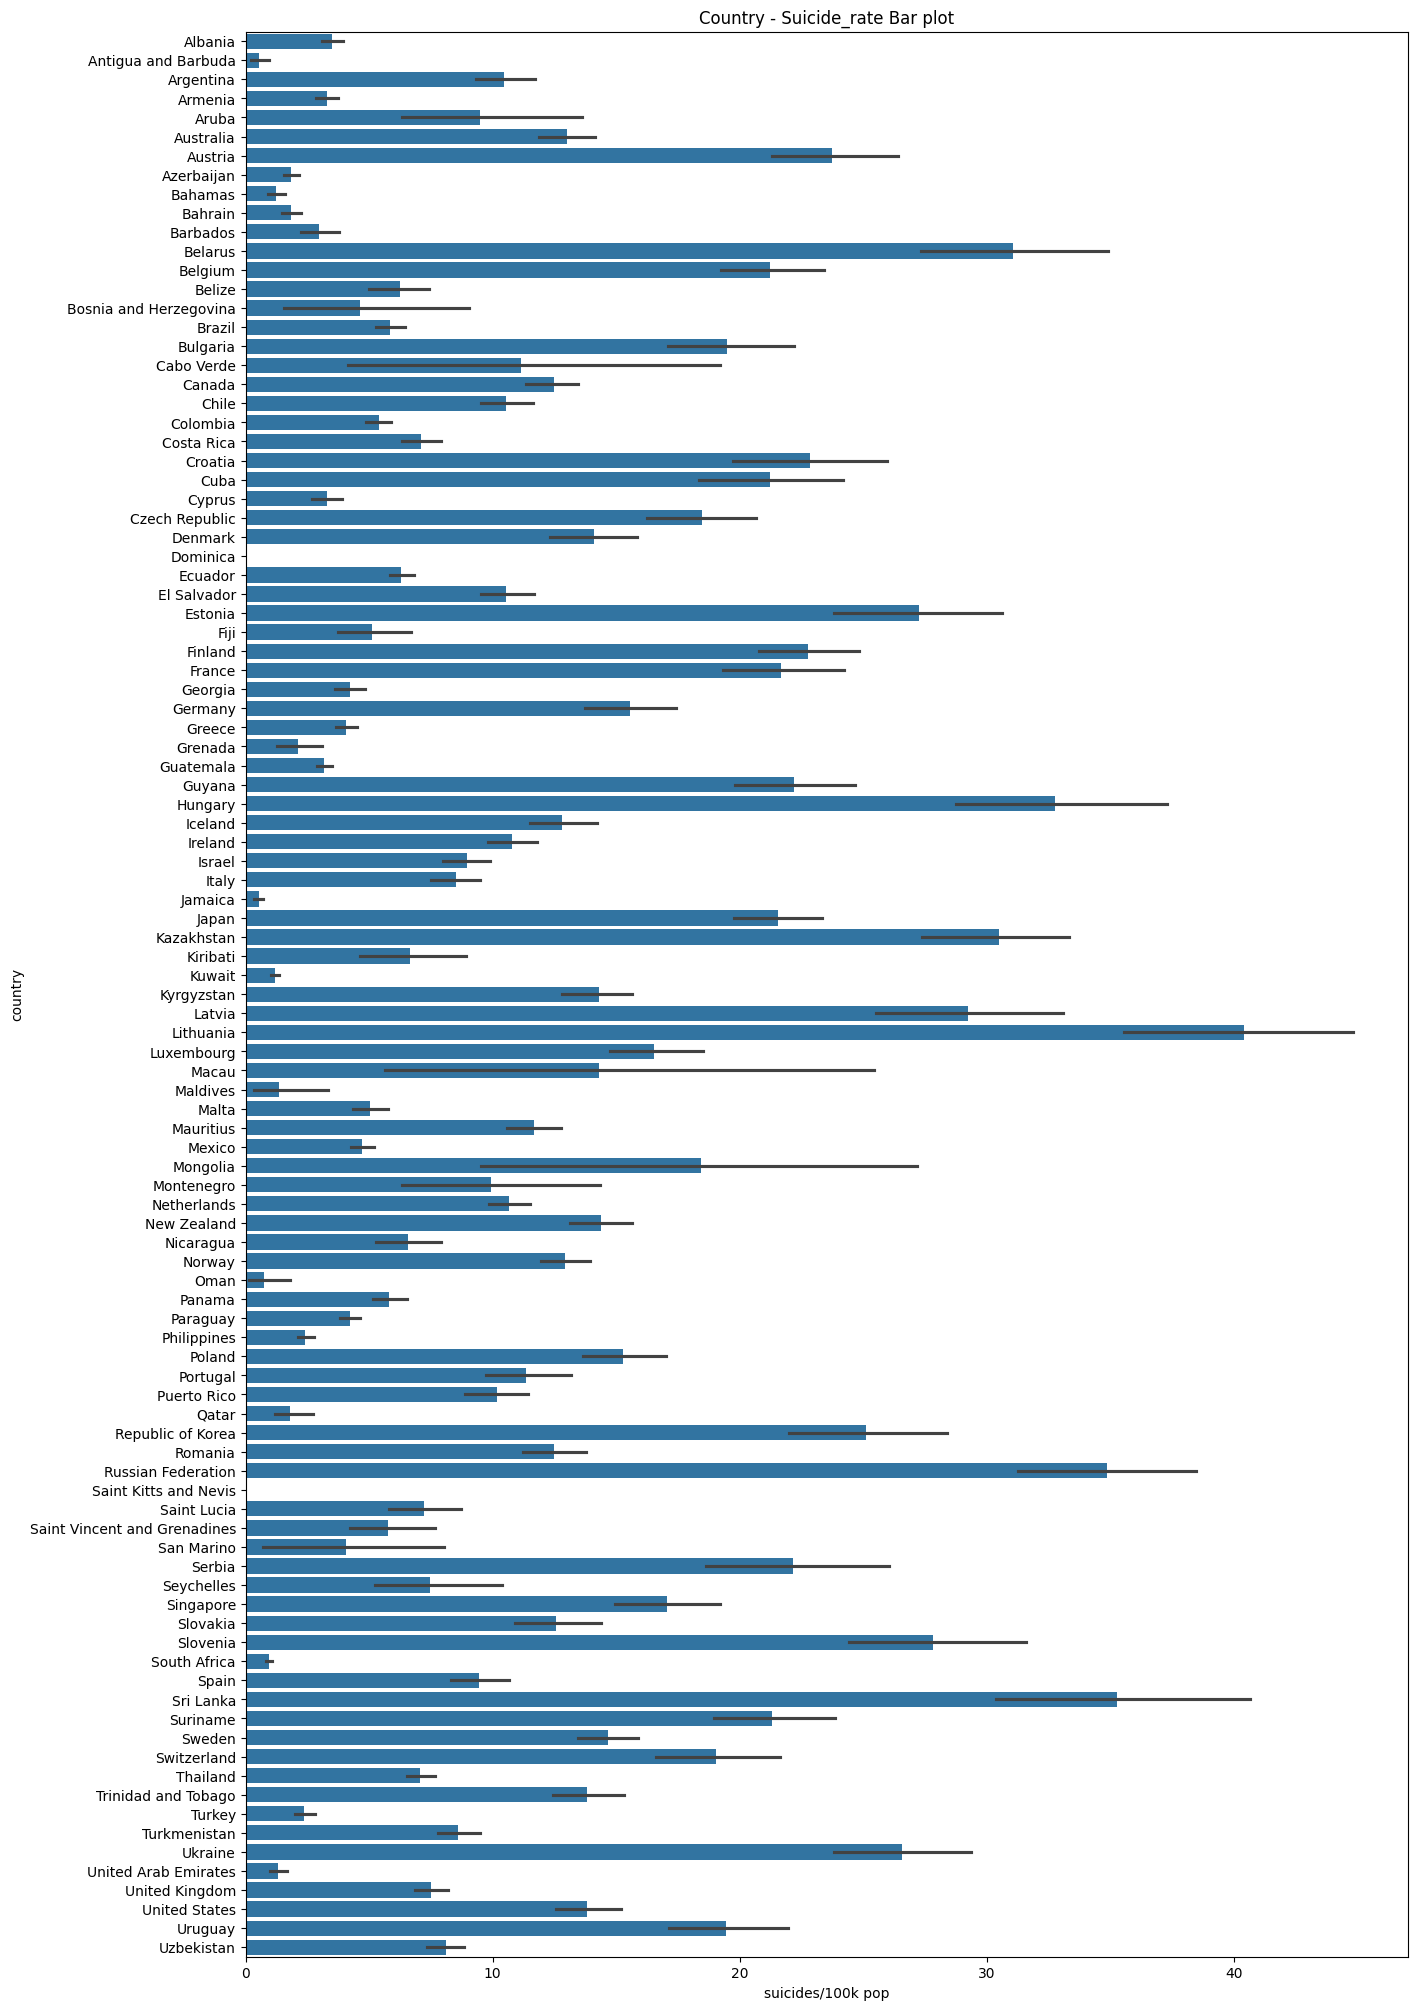

In [120]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicides/100k pop", y = "country", data = data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

<Axes: xlabel='year'>

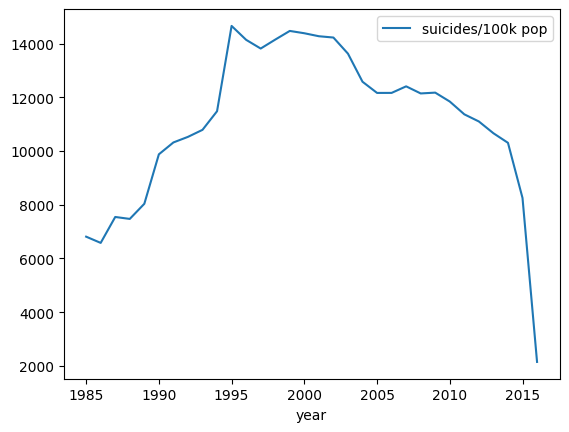

In [121]:
#Line plpot of year and suicide_rate

data[['year','suicides/100k pop']].groupby(['year']).sum().plot()

<Figure size 2000x1000 with 0 Axes>

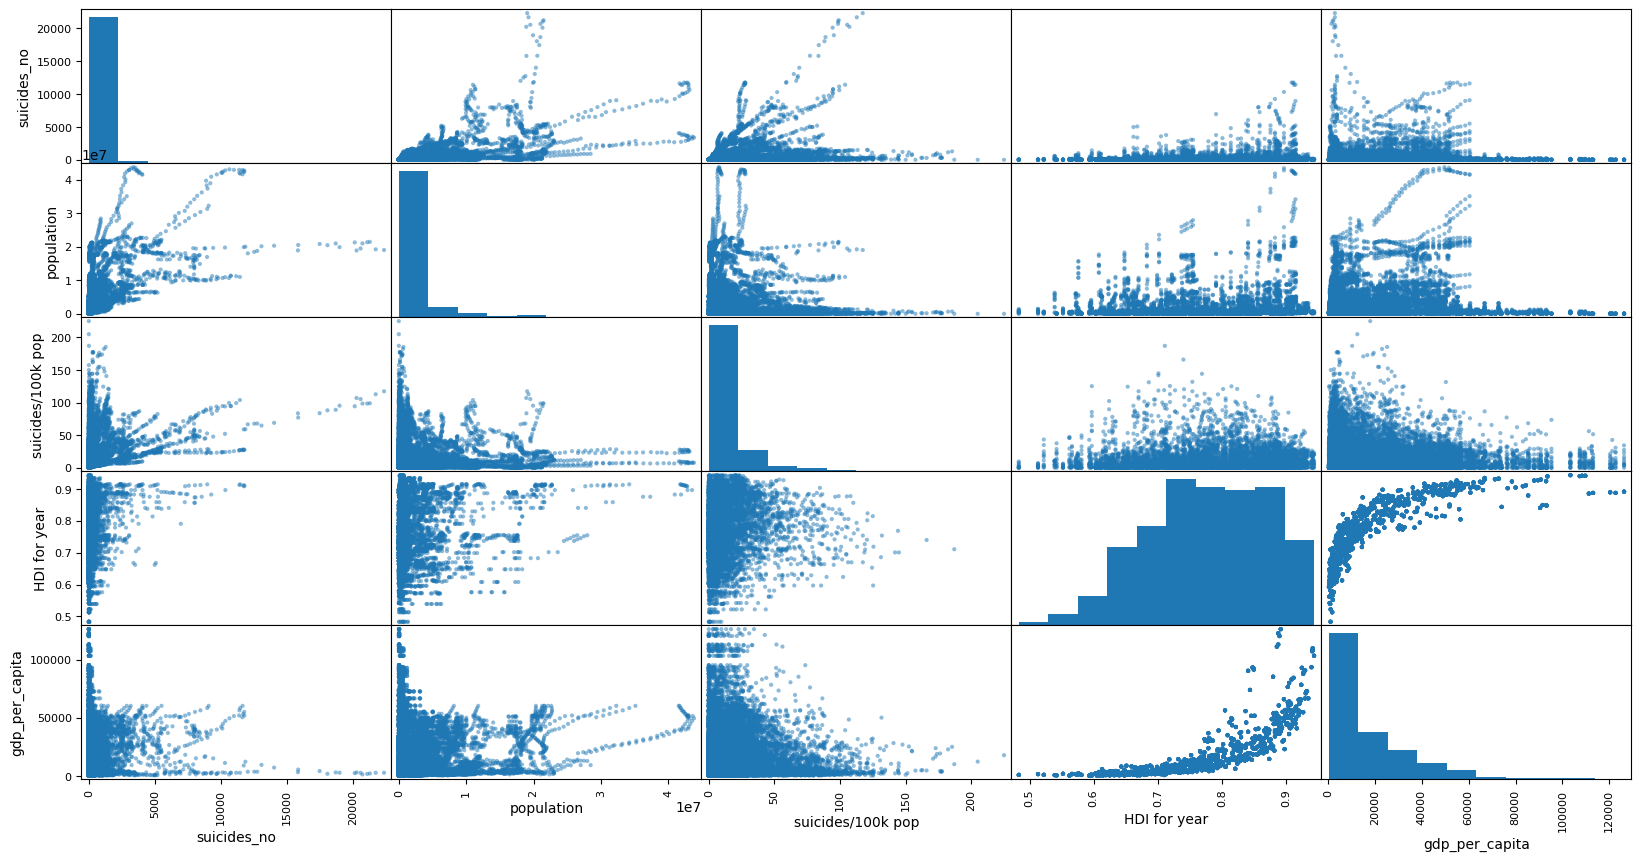

In [123]:
#Scatter matrix for checking outlier

plt.figure(figsize=(20,10))
attributes = ['suicides_no', 'population', 'suicides/100k pop','HDI for year',
              ' gdp_for_year','gdp_per_capita']
scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

Feature Selection using Variance Threshold, RandomForest, Correlation and ANOVA

In [124]:
# Data Cleaning
data[' gdp_for_year'] = data[' gdp_for_year'].replace({',': ''}, regex=True).astype(float)
data = data.drop(columns=['country-year', ' gdp_for_year'])  # Drop redundant columns
data['HDI for year'] = data['HDI for year'].fillna(data['HDI for year'].mean())

# Encoding categorical variables
label_encoders = {}
for column in ['country', 'sex', 'age', 'generation']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature and target variables
X = data.drop(columns=['suicides_no'])  # Assuming 'suicides_no' is the target
y = data['suicides_no']

# 1. Variance Threshold - Remove low variance features
variance_selector = VarianceThreshold(threshold=0.01)
X_variance_reduced = variance_selector.fit_transform(X)
low_variance_features = X.columns[~variance_selector.get_support()]
print("Low variance features:", low_variance_features.tolist())

# 2. Correlation Analysis - Identify highly correlated features
correlation_matrix = X.corr()
high_corr_features = correlation_matrix.columns[(correlation_matrix.abs() > 0.8).sum() > 1]
print("Highly correlated features (correlation > 0.8):", high_corr_features.tolist())

# 3. ANOVA - F-Test to find important features
anova_selector = SelectKBest(score_func=f_classif, k=5)
X_anova_selected = anova_selector.fit_transform(X, y)
anova_selected_features = X.columns[anova_selector.get_support()]
print("ANOVA selected features:", anova_selected_features.tolist())

# 4. Feature Importance using Random Forest with Sampling
# Sample the data for memory efficiency
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, random_state=42)  # 10% sample
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_sample, y_sample)
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Random Forest feature importances:\n", rf_feature_importances)


Low variance features: ['HDI for year']
Highly correlated features (correlation > 0.8): []
ANOVA selected features: ['country', 'sex', 'population', 'suicides/100k pop', 'generation']
Random Forest feature importances:
 suicides/100k pop    0.284411
population           0.203098
gdp_per_capita       0.136442
year                 0.113334
country              0.105987
HDI for year         0.058742
age                  0.045050
generation           0.036697
sex                  0.016240
dtype: float64


Splitting Data and selecting features

In [125]:
data = data.drop(['HDI for year', 'year'], axis = 1)
X = data.drop(columns=['suicides/100k pop'])
y = data['suicides/100k pop']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 7), (5564, 7))

Applying Models


In [127]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Model storage lists
ML_Model = []
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Define function to store results
def storeResults(model, train_r2, test_r2, train_rmse, test_rmse):
    ML_Model.append(model)
    r2_train.append(round(train_r2, 3))
    r2_test.append(round(test_r2, 3))
    rmse_train.append(round(train_rmse, 3))
    rmse_test.append(round(test_rmse, 3))

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)
storeResults('Linear Regression', r2_score(y_train, train_pred), r2_score(y_test, test_pred),
             mean_squared_error(y_train, train_pred, squared=False),
             mean_squared_error(y_test, test_pred, squared=False))

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
train_pred = knn_model.predict(X_train)
test_pred = knn_model.predict(X_test)
storeResults('KNN Regression', r2_score(y_train, train_pred), r2_score(y_test, test_pred),
             mean_squared_error(y_train, train_pred, squared=False),
             mean_squared_error(y_test, test_pred, squared=False))

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
train_pred = dt_model.predict(X_train)
test_pred = dt_model.predict(X_test)
storeResults('Decision Tree Regression', r2_score(y_train, train_pred), r2_score(y_test, test_pred),
             mean_squared_error(y_train, train_pred, squared=False),
             mean_squared_error(y_test, test_pred, squared=False))

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)
storeResults('Random Forest Regression', r2_score(y_train, train_pred), r2_score(y_test, test_pred),
             mean_squared_error(y_train, train_pred, squared=False),
             mean_squared_error(y_test, test_pred, squared=False))

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
train_pred = gb_model.predict(X_train)
test_pred = gb_model.predict(X_test)
storeResults('Gradient Boosting Regression', r2_score(y_train, train_pred), r2_score(y_test, test_pred),
             mean_squared_error(y_train, train_pred, squared=False),
             mean_squared_error(y_test, test_pred, squared=False))

# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)
storeResults('XGBoost Regressor', r2_score(y_train, train_pred), r2_score(y_test, test_pred),
             mean_squared_error(y_train, train_pred, squared=False),
             mean_squared_error(y_test, test_pred, squared=False))

# Bagging Regressor
bag_model = BaggingRegressor(random_state=42)
bag_model.fit(X_train, y_train)
train_pred = bag_model.predict(X_train)
test_pred = bag_model.predict(X_test)
storeResults('Bagging Regressor', r2_score(y_train, train_pred), r2_score(y_test, test_pred),
             mean_squared_error(y_train, train_pred, squared=False),
             mean_squared_error(y_test, test_pred, squared=False))

# MLP Regressor
mlp_model = MLPRegressor(random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)
train_pred = mlp_model.predict(X_train)
test_pred = mlp_model.predict(X_test)
storeResults('MLP Regressor', r2_score(y_train, train_pred), r2_score(y_test, test_pred),
             mean_squared_error(y_train, train_pred, squared=False),
             mean_squared_error(y_test, test_pred, squared=False))

# Display the results
results_df = pd.DataFrame({
    'Model': ML_Model,
    'Train R2': r2_train,
    'Test R2': r2_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test
})
print(results_df)

                          Model  Train R2  Test R2  Train RMSE  Test RMSE
0             Linear Regression     0.288    0.296      15.908     16.286
1                KNN Regression     0.306   -0.044      15.697     19.825
2      Decision Tree Regression     1.000    0.990       0.000      1.961
3      Random Forest Regression     0.999    0.994       0.577      1.501
4  Gradient Boosting Regression     0.954    0.949       4.030      4.397
5             XGBoost Regressor     0.998    0.993       0.736      1.655
6             Bagging Regressor     0.998    0.992       0.752      1.751
7                 MLP Regressor    -0.364   -0.312      22.009     22.229


**Statistical Testing**

### **Test 1: To check the difference in suicide rates between male and female**
Using independent sample t-test to check the difference in suicide rates between male and female. The hypothesis statements for this test are:

**H0:** There is no difference in the suicide rates among male and female (Null).<br>
**H1:** There is difference in the suicide rates among male and female (Alternate).

In [128]:
#collecting male suicide rate data
male = data['suicides/100k pop'][data['sex'] == 'male']
male

,suicides/100k pop


In [129]:
#collecting female suicide rate data
female = data['suicides/100k pop'][data['sex'] == 'female']
female

,suicides/100k pop


In [130]:
#calculating p value
ttest,pval = stats.ttest_rel(male, female)

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


**Test Conclusion:** By performing T-test, the result obtained is to reject the null hypothesis. This basically means that there is different in suicide rates of male & female.

### **Test 2: To find out the dependence of suicide rate on the age.**
Finding out whether there is a dependence of suicide rate on the age using the Chi- Square test. The hypothesis statements for this test are:

**H0:** Suicide rate and age are independent (Null).<br>
**H1:** Suicide rate and age are dependent (Alternate).

In [131]:
#Creating Contingency Table
contingency_table = pd.crosstab(data['suicides/100k pop'], data['age'])


In [132]:
#Significance Level 5%
alpha=0.05

In [133]:
chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

In [134]:
#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 26864.700169422224


In [135]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p)
#Here, pvalue = 0.0 and a low pvalue suggests that your sample provides enough evidence that you can reject  H0  for the entire population.

Significance level:  0.05
Degree of Freedom:  26485
chi-square statistic: 39571.48433519147
critical_value: 26864.700169422224
p-value: 0.0


In [136]:
#compare chi_square_statistic with critical_value and p-value which is the
#probability of getting chi-square>0.09 (chi_square_statistic)
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")

if p<=alpha:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")

Reject H0,There is a dependency between Age group & Suicide rate.
Reject H0,There is a dependency between Age group & Suicide rate.


**Test Conclusion:** By performing Chi- Square test, the result obtained is to reject the null hypothesis. This basically means that there is dependency between Age group & Suicide rate.